In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option("display.max_columns", 100) 

# Read Data

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.sample(5)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14844/3195254163.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
369232,369232,19075394,21278146,16800,16800,16800.0,60 months,14.49,395.19,C,C4,store manager,8 years,OWN,57000.0,Verified,Jun-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,Business,338xx,FL,21.05,0.0,Jun-03,1.0,NaN,NaN,15.0,0.0,11926,21.7,27.0,w,0.00,0.00,18581.96000,18581.96,16800.00,1781.96,0.0,0.0,0.0,Mar-15,15420.44,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,148290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55000.0,NaN,NaN,NaN
347494,347494,21020203,23302940,25850,25850,25850.0,60 months,18.24,659.80,D,D5,Mission Systems Technician,10+ years,MORTGAGE,59000.0,Source Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,984xx,WA,12.35,1.0,Feb-01,1.0,11.0,NaN,7.0,0.0,10964,60.2,26.0,f,20372.20,20372.20,11876.40000,11876.40,5477.80,6398.60,0.0,0.0,0.0,Jan-16,659.80,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,231599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18200.0,NaN,NaN,NaN
374364,374364,18394632,20557319,9000,9000,9000.0,36 months,19.52,332.28,E,E2,Regional Planner,10+ years,RENT,111000.0,Not Verified,Jun-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,802xx,CO,15.13,0.0,Mar-82,1.0,NaN,NaN,12.0,0.0,22975,62.6,12.0,f,4900.32,4900.32,6313.32000,6313.32,4099.68,2213.64,0.0,0.0,0.0,Jan-16,332.28,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,43269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36700.0,NaN,NaN,NaN
433256,433256,12438230,14450362,15000,15000,15000.0,60 months,12.99,341.22,B,B5,Supply NCO,10+ years,MORTGAGE,61000.0,Verified,Mar-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 03/03/14 > Credit Consolid...,debt_consolidation,Debt consolidation,559xx,MN,28.90,0.0,Aug-01,1.0,50.0,NaN,10.0,0.0,19527,51.7,25.0,f,0.00,0.00,15481.29605,15481.30,15000.00,481.30,0.0,0.0,0.0,Jun-14,14798.86,NaN,Jun-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,205638.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37800.0,NaN,NaN,NaN
174946,174946,2905911,3538233,5000,5000,5000.0,36 months,14.33,171.70,C,C1,JPMorgan Chase,1 year,RENT,55000.0,Not Verified,Jan-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/02/13 > I went a little...,debt_consolidation,Credit Card Consolidation,198xx,DE,2.57,0.0,May-79,2.0,NaN,NaN,5.0,0.0,4530,16.7,5.0,f,0.00,0.00,5791.54847,5791.55,5000.00,791.55,0.0,0.0,0.0,Jan-15,981.38,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27200.0,NaN,NaN,NaN


# Feature Engineering

## Defining Label

In [3]:
df_new = df.copy()

In [4]:
df_new['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- There are 9 unique values in 'loan_status' feature.
- For Loan status 'Charged Off', both 'Late', 'Default' and both 'Does not meet the credit policy' status we will consider these borrowers as _Bad Borrowers_.
- For Loan status 'Current', 'Fully Paid' and 'In Grace Period' we will consider these borrowers as _Good Borrowers_.
- We will create a new feature _'borrowers_status'_ containing the value _0 (Good Borrowers)_ and _1 (Bad Borrowers)_.

In [5]:
good = ['Current', 'Fully Paid', 'In Grace Period']

df_new['borrowers_status'] = np.where(df_new['loan_status'].isin(good),0,1)
df_new['borrowers_status'].value_counts()/len(df_new['borrowers_status'])*100

0    88.381784
1    11.618216
Name: borrowers_status, dtype: float64

Around 88.38% is Good Borrowers and around 11,62% is Bad Borrowers.

## Change Feature 'term' Value

In [6]:
df_new['term'] = df_new['term'].apply(lambda term: int(term[:3])) #filter for first 2 character

# Descriptive Statistics

In [7]:
df_new.shape

(466285, 76)

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  int64  
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

1. Dataset consists of 76 Columns/Features and 466285 Rows.
2. Some Features have several Missing/Null Values and there are columns where all values are missing.
3. Most Features have a Numeric data type (int/float). 
4. We can drop 'Unnamed: 0', 'id' and 'member_id' because these Features only show row numbers and indentifitacion numbers which are not very useful in modeling.
5. We also can drop Features where all values are missing.

In [9]:
df_nums = df_new.select_dtypes(exclude='object')
df_cats = df_new.select_dtypes(include='object')

In [10]:
df_nums.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
term,466285.0,4.260533e+01,1.071904e+01,36.00,3.600000e+01,3.600000e+01,6.000000e+01,6.000000e+01
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06


1. The minimum loan amount granted is 500 while the maximum amount is 35000.
2. Feature 'policy_code' has only 1 unique value, we will drop these Features later.
3. The minimum annual income of borrower is 1896 while the maximum income is 7500000.

In [11]:
df_cats.describe().T

,count,unique,top,freq
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276
url,466285,466285,https://www.lendingclub.com/browse/loanDetail....,1


1. Feature 'term' has 2 unique values and we need to change these Feature data type before modeling.
2. Feature 'emp_title' has a lot of unique values and the most frequent value (Teacher) is only around 1% of the total value, we might need to drop these Feature later.
3. The most common type of home ownership from borrowers is Mortage (around 50%).
4. Features 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d' and 'last_credit_pull_d' has date value and we need to change their date type to datetime.
5. 'application_type' only has 1 unique value, we will drop these Feature later.
6. All values in Feature 'url' is unique and more than 90% value in Feature 'desc' is unique, we might need to drop these column later.

In [12]:
columns = ['Unnamed: 0','id','member_id','policy_code','application_type','title', 'url','zip_code', 'addr_state',
           'sub_grade','emp_title','pymnt_plan','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m',
          'open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il', 'il_util','open_rv_12m',
           'open_rv_24m', 'max_bal_bc', 'all_util','inq_fi', 'total_cu_tl', 'inq_last_12m', 'issue_d']

In [13]:
df_new.drop(columns, axis = 1, inplace = True)

## Change Data Type for Date Features

In [14]:
df_new['earliest_cr_line'] = pd.to_datetime(df_new['earliest_cr_line'], format = '%b-%y')
df_new['last_credit_pull_d'] = pd.to_datetime(df_new['last_credit_pull_d'], format = '%b-%y')
df_new['last_pymnt_d'] = pd.to_datetime(df_new['last_pymnt_d'], format = '%b-%y')
df_new['next_pymnt_d'] = pd.to_datetime(df_new['next_pymnt_d'], format = '%b-%y')

In [15]:
df_new[(df_new['loan_status']=='Current') | (df_new['loan_status']=='In Grace Period')]['next_pymnt_d'].value_counts()

2016-02-01    200646
2016-01-01     26709
2016-03-01        17
Name: next_pymnt_d, dtype: int64

We will calculate the distance in Month for date features to the latest date (March 2016) based on above. 

In [16]:
# count the distance until the assumed date (March 1st, 2016)
df_new['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_new['earliest_cr_line']) / np.timedelta64(1, 'M')))
df_new['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_new['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df_new['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_new['last_pymnt_d']) / np.timedelta64(1, 'M')))
df_new['next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_new['next_pymnt_d']) / np.timedelta64(1, 'M')))

# Multivariate Analysis

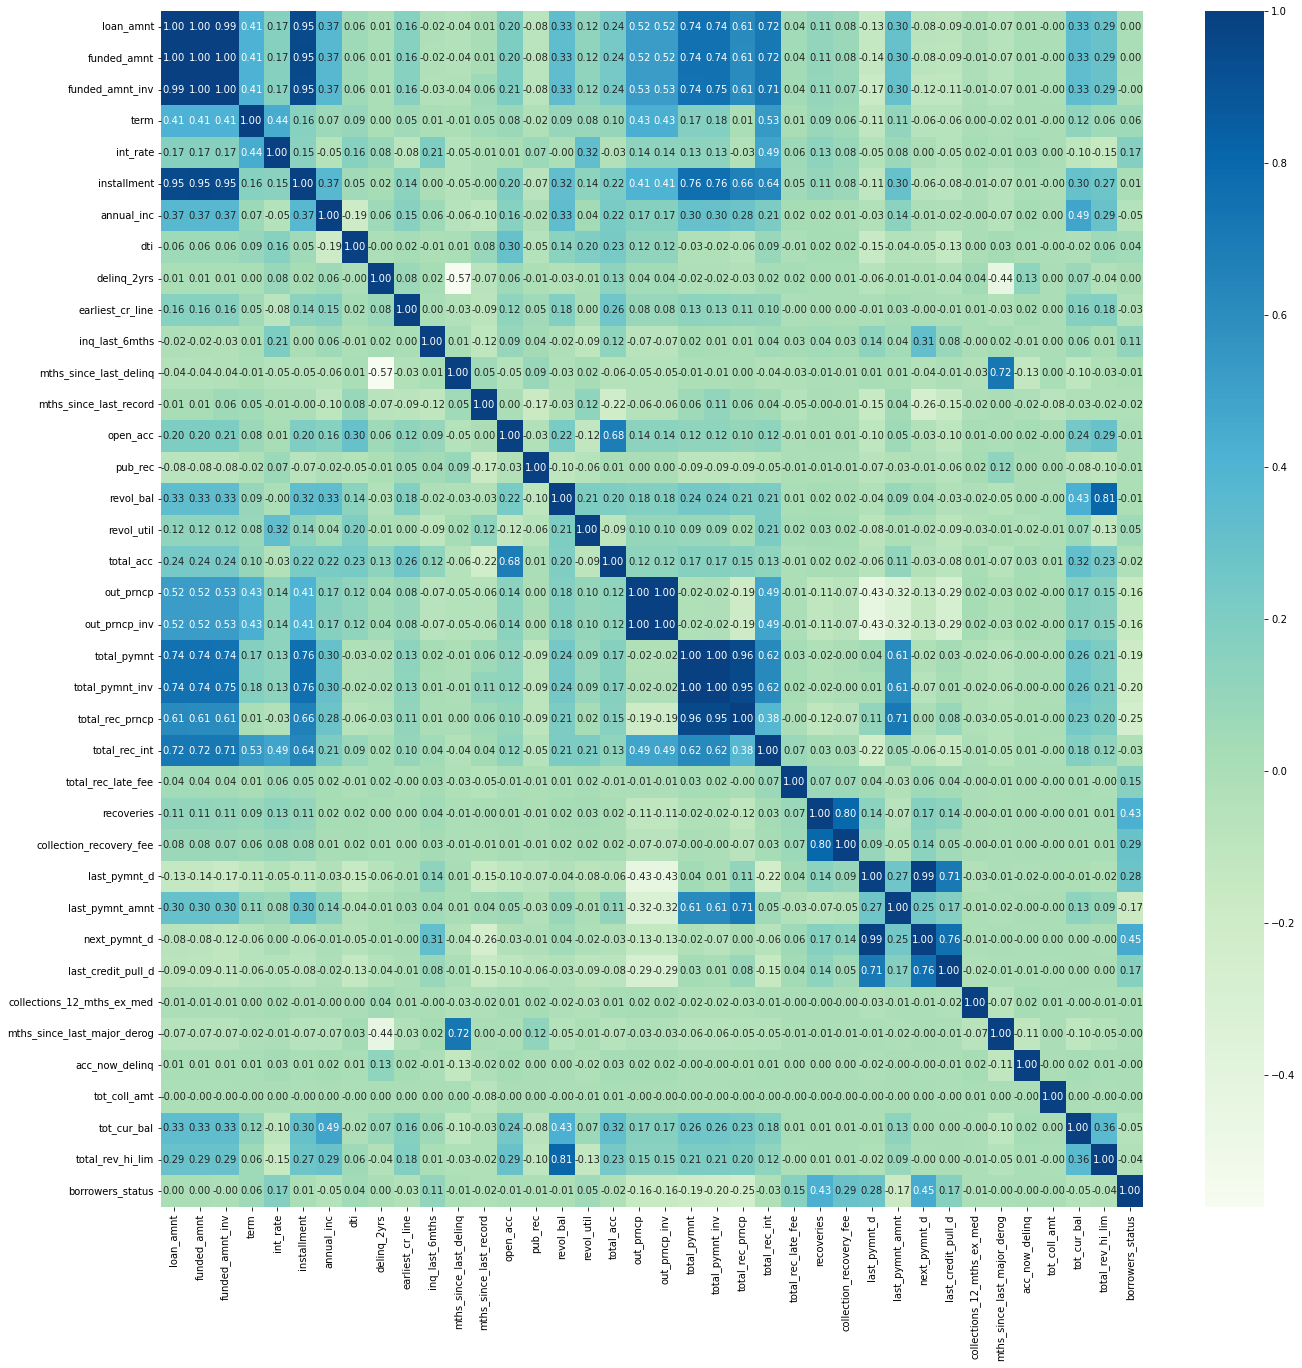

In [17]:
plt.figure(figsize=(22,22))
sns.heatmap(df_new.corr(), cmap='GnBu', annot=True, fmt='.2f')
plt.show()

There is a large correlation for several features, we need to drop some of these features to prevent multicolinearity. We will use correlation value 0.7 as threshold to drop some of these features.

In [18]:
# create a square matrix with dimensions equal to the number of features
corr_matrix = df_new.corr().abs()

# select the upper triangular
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

# create drop list with correlation value 0.7 as threshold
drop_list = [col for col in upper.columns if any(upper[col] > 0.7)]
print('Features that we will drop :')
drop_list

Features that we will drop :


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'mths_since_last_major_derog',
 'total_rev_hi_lim']

In [19]:
df_new.drop(drop_list, axis = 1, inplace = True)

# Data Pre-processing

In [20]:
df_clean = df_new.copy()

## Check Duplicated Data

In [21]:
df_clean.duplicated().sum()

0

## Handling Missing Value

In [22]:
tot_null = df_clean.isnull().sum()
percent_missing = df_clean.isnull().sum() * 100/ len(df_clean)
df_missing_value = pd.DataFrame({'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

,index,percent_missing
0,mths_since_last_record,86.566585
1,desc,72.981546
2,mths_since_last_delinq,53.690554
3,tot_cur_bal,15.071469
4,tot_coll_amt,15.071469
5,emp_length,4.505399
6,last_pymnt_d,0.080637
7,revol_util,0.072917
8,collections_12_mths_ex_med,0.031097
9,total_acc,0.006219


- Features 'mths_since_last_record' and 'desc' has missing value more than 70%, so we will drop these features.
- Feature 'mths_since_last_delinq' has missing value around 53% and since these feature has small correlation to label (around -0.01) so we will drop these feature.
- We will use Imputation to replace missing value for the other features with Median for numerical features and Mode for Categorical features.

In [23]:
df_clean.drop(['mths_since_last_record','desc','mths_since_last_delinq'], axis = 1, inplace = True)

In [24]:
# Numerical features
for col in df_clean.select_dtypes(exclude = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical features
for col in df_clean.select_dtypes(include = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df_clean.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
borrowers_status              0
dtype: int64

# Business Analysis

In this section we will try to gain Business Insight from dataset.

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  object 
 9   purpose                     466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  delinq_2yrs                 466285 non-null  float64
 12  earliest_cr_line            466285 non-null  float64
 13  inq_last_6mths

In [26]:
plt.style.use("seaborn-white")

## Term vs Borrowers Status

In [27]:
term_group = df_clean.groupby(['term','borrowers_status']).size().reset_index(name='num_of_borrowers')
term_group['pct_status'] = round((term_group['num_of_borrowers']*100)/term_group.groupby(['term'])['num_of_borrowers'].transform('sum'),2)
term_group['borrowers_status'] = term_group['borrowers_status'].replace([0,1],['Good','Bad'])
term_group['term'] = term_group['term'].replace([36,60],['36 Months','60 Months'])
term_group

,term,borrowers_status,num_of_borrowers,pct_status
0,36 Months,Good,302585,89.53
1,36 Months,Bad,35368,10.47
2,60 Months,Good,109526,85.35
3,60 Months,Bad,18806,14.65


In [28]:
term = df_clean.groupby(['term']).size().reset_index(name='num_of_borrowers')
term['pct'] = round((term['num_of_borrowers']*100)/df_clean.shape[0],2)
term['term'] = term['term'].replace([36,60],['36 Months','60 Months'])
term

,term,num_of_borrowers,pct
0,36 Months,337953,72.48
1,60 Months,128332,27.52


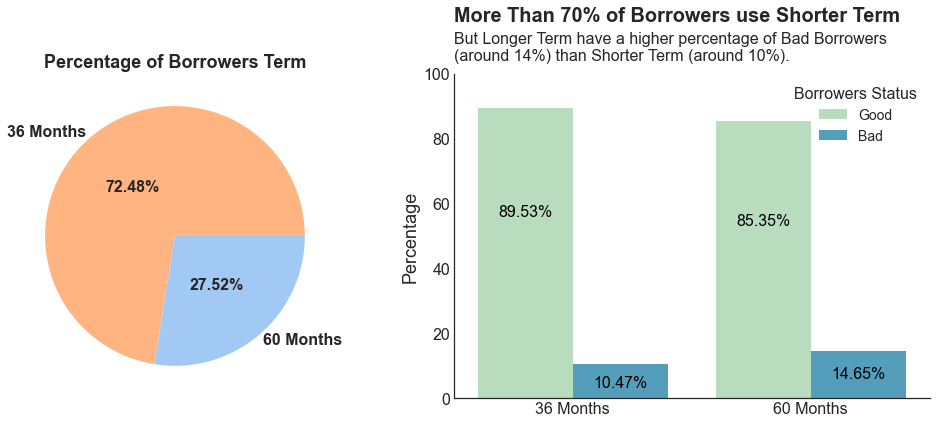

In [29]:
plt.figure(figsize=(15,6))

#Plot Pie Chart
plt.subplot(121)
color1 = [sns.color_palette('pastel')[1],sns.color_palette('pastel')[0]]
pie = plt.pie(term['pct'], labels=term['term'], colors=color1, autopct='%0.2f%%', labeldistance=1.05, 
              pctdistance=0.5, textprops={'fontsize':16,'fontweight':'bold'})
plt.title('Percentage of Borrowers Term', weight='bold', fontsize=18)

#Plot Bar Chart
plt.subplot(122)
bar = sns.barplot(x=term_group['term'], y=term_group['pct_status'], hue=term_group['borrowers_status'],
                  palette='GnBu')
for p in bar.patches :
    bar.annotate('%0.2f'% p.get_height()+'%', xy=(p.get_x() + p.get_width()/2, p.get_height()/1.5),
                xytext=(0,-12), textcoords='offset points', ha='center', fontsize=16, color='black')
bar.set_ylim(0, 100)
bar.set(xlabel=None)
bar.set(ylabel='Percentage')
bar.yaxis.label.set_fontsize(18)
bar.tick_params(axis='both', which='major', labelsize=16)
bar.legend(title='Borrowers Status', title_fontsize=16, fontsize = 14, loc="upper right")

bar.text(x=-0.5, y=116, s='More Than 70% of Borrowers use Shorter Term',
         fontsize=20, weight='bold')
bar.text(x=-0.5, y=104, s='But Longer Term have a higher percentage of Bad Borrowers \n(around 14%) than Shorter Term (around 10%).',
         fontsize=16)

sns.despine()
plt.tight_layout()
plt.savefig('term', dpi=200)
plt.show()

## Home Ownership vs Borrowers Status

In [30]:
df_clean['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

We will combine value 'OTHER', 'NONE' and 'ANY' as new value 'OTHERS'.

In [31]:
df_temp = df_clean.copy()

In [32]:
def func(x):
    if x['home_ownership'] == 'MORTGAGE':
        val = 'MORTGAGE'
    elif x['home_ownership'] == 'RENT':
        val ='RENT'
    elif x['home_ownership'] == 'OWN':
        val ='OWN'
    else:
        val ='OTHERS'
    return val

df_temp['home_ownership'] = df_temp.apply(func, axis=1)

In [33]:
home_group = df_temp.groupby(['home_ownership','borrowers_status']).size().reset_index(name='num_of_borrowers')
home_group['pct_status'] = round((home_group['num_of_borrowers']*100)/home_group.groupby(['home_ownership'])['num_of_borrowers'].transform('sum'),2)
home_group['borrowers_status'] = home_group['borrowers_status'].replace([0,1],['Good','Bad'])
home_group = home_group[home_group['borrowers_status']=='Bad']
home_group

,home_ownership,borrowers_status,num_of_borrowers,pct_status
1,MORTGAGE,Bad,24155,10.24
3,OTHERS,Bad,77,33.05
5,OWN,Bad,4781,11.46
7,RENT,Bad,25161,13.35


In [34]:
home = df_temp.groupby(['home_ownership']).size().reset_index(name='num_of_borrowers')
home['pct'] = round((home['num_of_borrowers']*100)/df_temp.shape[0],2)
home

,home_ownership,num_of_borrowers,pct
0,MORTGAGE,235875,50.59
1,OTHERS,233,0.05
2,OWN,41704,8.94
3,RENT,188473,40.42


In [35]:
def palette(series):
    max_val = series.max()
    min_val = series.min()
    pal = []
    
    for item in series:
        if item == 33.05:
            pal.append('indianred')
        elif item == 10.24 :
            pal.append('royalblue')
        else:
            pal.append('darkgrey')
    return pal

No handles with labels found to put in legend.


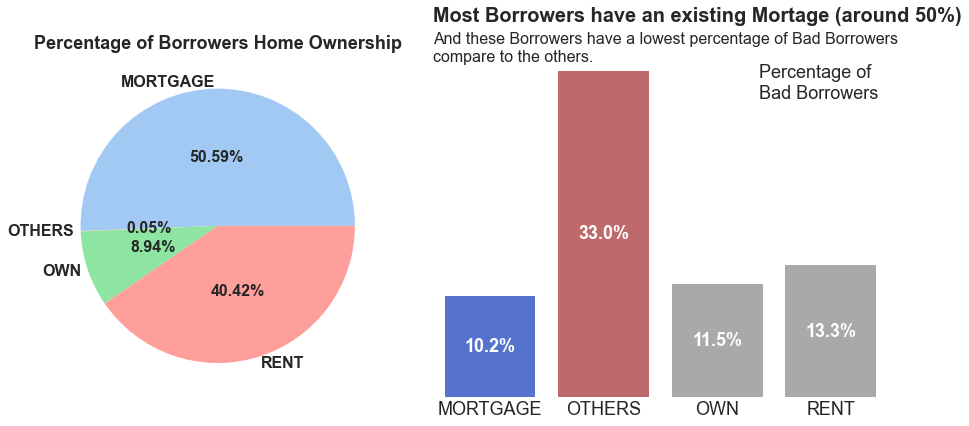

In [36]:
plt.figure(figsize=(15,6))

#Plot Pie Chart 
plt.subplot(121)
color1 = sns.color_palette('pastel')
pie = plt.pie(home['pct'], labels=home['home_ownership'], colors=color1, autopct='%0.2f%%', labeldistance=1.05, 
              pctdistance=0.5, textprops={'fontsize':16,'fontweight':'bold'})
plt.title('Percentage of Borrowers Home Ownership', weight='bold', fontsize=18)

#Plot Bar Chart
plt.subplot(122)
bar = sns.barplot(x=home_group['home_ownership'], y=home_group['pct_status'], palette=palette(home_group['pct_status']))
for p in bar.patches :
    bar.annotate('%0.1f'% p.get_height()+'%', xy=(p.get_x() + p.get_width()/2, p.get_height()/2),
                xytext=(0,-5), textcoords='offset points', ha='center', fontsize=18, color='white', weight='bold')
bar.set(yticks=[])
bar.set(xlabel=None)
bar.set(ylabel=None)
bar.legend(title='Percentage of\nBad Borrowers', title_fontsize=18, loc="upper right")
bar.tick_params(axis='x', which='major', labelsize=18)

bar.text(x=-0.5, y=38, s='Most Borrowers have an existing Mortage (around 50%)',
         fontsize=20, weight='bold')
bar.text(x=-0.5, y=34, s='And these Borrowers have a lowest percentage of Bad Borrowers \ncompare to the others.',
         fontsize=16)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('home', dpi=200)
plt.show()

# Feature Selection Using Weight of Evidence & Information Value

In [37]:
df_feature_selection = df_clean.drop('loan_status', axis = 1)

In [38]:
# code automation

def woe(raw, feature_name):
    # probability analysis
    feature_name = raw.groupby(feature_name).agg(num_observation=('borrowers_status','count'),
                                                good_loan_prob=('borrowers_status','mean')).reset_index()
    
    # find the feature proportion
    feature_name['feat_proportion'] = feature_name['num_observation']/(feature_name['num_observation'].sum())
    
    # find number of approved loan behavior
    feature_name['num_loan_approve'] = feature_name['feat_proportion'] * feature_name['num_observation']

    # find number of declined loan behavior
    feature_name['num_loan_decline'] = (1-feature_name['feat_proportion']) * feature_name['num_observation']

    # find approved loan proportion
    feature_name['prop_loan_approve'] = feature_name['num_loan_approve'] / (feature_name['num_loan_approve'].sum())

    # find declined loan proportion
    feature_name['prop_loan_decline'] = feature_name['num_loan_decline'] / (feature_name['num_loan_decline'].sum())

    # calculate weight of evidence
    feature_name['weight_of_evidence'] = np.log(feature_name['prop_loan_approve'] / feature_name['prop_loan_decline'])

    # sort values by weight of evidence
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    
    # calculate information value
    feature_name['information_value'] = (feature_name['prop_loan_approve']-feature_name['prop_loan_decline']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()

    #Show
    feature_name = feature_name.drop(['feat_proportion','num_loan_approve','num_loan_decline','prop_loan_approve','prop_loan_decline'],axis = 1)

    return feature_name

In [39]:
nums = df_feature_selection.select_dtypes(exclude='object').columns
cats = df_feature_selection.select_dtypes(include='object').columns

## Numerical

In [40]:
nums

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'borrowers_status'],
      dtype='object')

In [41]:
df_feature_selection['loan_amnt_fs'] = pd.cut(df_feature_selection['loan_amnt'], 5)
woe(df_feature_selection,'loan_amnt_fs')

,loan_amnt_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(28100.0, 35000.0]",34906,0.124133,-1.391294,0.249414
1,"(21200.0, 28100.0]",52172,0.117496,-0.948559,0.249414
2,"(465.5, 7400.0]",103603,0.115904,-0.129926,0.249414
3,"(14300.0, 21200.0]",118918,0.116542,0.051086,0.249414
4,"(7400.0, 14300.0]",156686,0.113884,0.442000,0.249414


In [42]:
woe(df_feature_selection,'term')

,term,num_observation,good_loan_prob,weight_of_evidence,information_value
0,60,128332,0.146542,-1.378129,0.72423
1,36,337953,0.104654,0.558444,0.72423


In [43]:
df_feature_selection['int_rate_fs'] = pd.cut(df_feature_selection['int_rate'], 5)
woe(df_feature_selection,'int_rate_fs')

,int_rate_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(21.932, 26.06]",23189,0.238130,-1.899708,0.284226
1,"(17.804, 21.932]",57785,0.190759,-0.905362,0.284226
2,"(5.399, 9.548]",83978,0.040141,-0.465268,0.284226
3,"(13.676, 17.804]",147973,0.139296,0.284398,0.284226
4,"(9.548, 13.676]",153360,0.088980,0.337225,0.284226


In [44]:
df_feature_selection['annual_inc_fs'] = pd.cut(df_feature_selection['annual_inc'], 5)
woe(df_feature_selection,'annual_inc_fs')

,annual_inc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(3001137.6, 4500758.4]",1,0.000000,-22.467463,10.68265
1,"(4500758.4, 6000379.2]",4,0.000000,-21.081162,10.68265
2,"(6000379.2, 7500000.0]",4,0.000000,-21.081162,10.68265
3,"(1501516.8, 3001137.6]",10,0.000000,-20.164858,10.68265
4,"(-5602.104, 1501516.8]",466266,0.116187,0.693160,10.68265


In [45]:
df_feature_selection['dti_fs'] = pd.cut(df_feature_selection['dti'], 5)
woe(df_feature_selection,'dti_fs')

,dti_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(31.992, 39.99]",16407,0.135186,-2.306884,0.293918
1,"(-0.04, 7.998]",59690,0.098358,-0.914269,0.293918
2,"(23.994, 31.992]",80361,0.136173,-0.564727,0.293918
3,"(7.998, 15.996]",154680,0.102890,0.304006,0.293918
4,"(15.996, 23.994]",155147,0.123928,0.308521,0.293918


In [46]:
df_feature_selection['delinq_2yrs_fs'] = pd.cut(df_feature_selection['delinq_2yrs'], 5)
woe(df_feature_selection,'delinq_2yrs_fs')

,delinq_2yrs_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(23.2, 29.0]",2,0.000000,-17.422435,5.899539
1,"(17.4, 23.2]",13,0.153846,-15.550609,5.899539
2,"(11.6, 17.4]",86,0.232558,-13.661055,5.899539
3,"(5.8, 11.6]",1369,0.119795,-10.890811,5.899539
4,"(-0.029, 5.8]",464815,0.116149,0.693343,5.899539


In [47]:
df_feature_selection['earliest_cr_line_fs'] = pd.cut(df_feature_selection['earliest_cr_line'], 10)
woe(df_feature_selection,'earliest_cr_line_fs')

,earliest_cr_line_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(-393.2, -273.3]",4,0.000000,-11.225009,0.52719
1,"(-513.1, -393.2]",48,0.145833,-8.740008,0.52719
2,"(-634.199, -513.1]",1117,0.135184,-5.590512,0.52719
3,"(-33.5, 86.4]",7464,0.128349,-3.677329,0.52719
4,"(446.1, 566.0]",9154,0.096024,-3.469539,0.52719
5,"(326.2, 446.1]",45234,0.096277,-1.789665,0.52719
6,"(206.3, 326.2]",173251,0.109818,-0.084307,0.52719
7,"(86.4, 206.3]",230013,0.125202,0.414392,0.52719
8,"(-273.3, -153.4]",0,NaN,NaN,0.52719
9,"(-153.4, -33.5]",0,NaN,NaN,0.52719


In [48]:
df_feature_selection['inq_last_6mths_fs'] = np.where(df_feature_selection['inq_last_6mths'] == 0,0,
                                    np.where((df_feature_selection['inq_last_6mths'] > 0)&(df_feature_selection['inq_last_6mths'] <=3),1,
                                    np.where((df_feature_selection['inq_last_6mths']>3)&(df_feature_selection['inq_last_6mths']<=6),2,
                                    np.where((df_feature_selection['inq_last_6mths']>6)&(df_feature_selection['inq_last_6mths']<=9),3,4))))
woe(df_feature_selection,'inq_last_6mths_fs')

,inq_last_6mths_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,4,95,1.000000,-8.409390,0.188408
1,3,367,0.852861,-7.057322,0.188408
2,2,11197,0.262838,-3.615764,0.188408
3,1,213099,0.130967,-0.083286,0.188408
4,0,241527,0.094871,0.161038,0.188408


In [49]:
df_feature_selection['open_acc_fs'] = pd.cut(df_feature_selection['open_acc'], 5)
woe(df_feature_selection,'open_acc_fs')

,open_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(67.2, 84.0]",4,0.500000,-12.858748,1.830395
1,"(50.4, 67.2]",22,0.000000,-11.153962,1.830395
2,"(33.6, 50.4]",898,0.113586,-7.442954,1.830395
3,"(16.8, 33.6]",61622,0.113093,-3.074535,1.830395
4,"(-0.084, 16.8]",403739,0.116662,0.672367,1.830395


In [50]:
df_feature_selection['pub_rec_fs'] = pd.cut(df_feature_selection['pub_rec'], 5)
woe(df_feature_selection,'pub_rec_fs')

,pub_rec_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(25.2, 37.8]",1,0.000000,-22.703865,10.838649
1,"(37.8, 50.4]",2,0.000000,-22.010715,10.838649
2,"(50.4, 63.0]",2,0.000000,-22.010715,10.838649
3,"(12.6, 25.2]",10,0.000000,-20.401260,10.838649
4,"(-0.063, 12.6]",466270,0.116186,0.693155,10.838649


In [51]:
df_feature_selection['revol_bal_fs'] = np.where((df_feature_selection['revol_bal']>=0)&(df_feature_selection['revol_bal']<=5000),0,
                               np.where((df_feature_selection['revol_bal']>5000)&(df_feature_selection['revol_bal']<=10000),1,
                               np.where((df_feature_selection['revol_bal']>10000)&(df_feature_selection['revol_bal']<=15000),2,3)))
woe(df_feature_selection,'revol_bal_fs')

,revol_bal_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,82590,0.124761,-0.576520,0.197731
1,2,88805,0.117989,-0.487635,0.197731
2,1,115537,0.119520,-0.151038,0.197731
3,3,179353,0.109187,0.489550,0.197731


In [52]:
df_feature_selection['revol_util_fs'] = np.where((df_feature_selection['revol_util']>=0)&(df_feature_selection['revol_util']<=20),0,
                                np.where((df_feature_selection['revol_util']>20)&(df_feature_selection['revol_util']<=40),1,
                                np.where((df_feature_selection['revol_util']>40)&(df_feature_selection['revol_util']<=60),2,
                                np.where((df_feature_selection['revol_util']>60)&(df_feature_selection['revol_util']<=80),3,4))))

woe(df_feature_selection,'revol_util_fs')

,revol_util_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,37402,0.092562,-1.220141,0.157668
1,1,83492,0.098321,-0.303424,0.157668
2,4,84062,0.140551,-0.295130,0.157668
3,2,129737,0.110886,0.266088,0.157668
4,3,131592,0.123883,0.285812,0.157668


In [53]:
df_feature_selection['total_acc_fs'] = pd.cut(df_feature_selection['total_acc'], 5)
woe(df_feature_selection,'total_acc_fs')

,total_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(125.0, 156.0]",2,0.000000,-12.936344,1.03453
1,"(94.0, 125.0]",28,0.035714,-10.297231,1.03453
2,"(63.0, 94.0]",1221,0.095823,-6.519448,1.03453
3,"(32.0, 63.0]",107819,0.108089,-1.778323,1.03453
4,"(0.845, 32.0]",357215,0.118702,0.609405,1.03453


In [54]:
df_feature_selection['out_prncp_fs'] = np.where((df_feature_selection['out_prncp']>=0)&(df_feature_selection['out_prncp']<=1000),0,
                               np.where((df_feature_selection['out_prncp']>1000)&(df_feature_selection['out_prncp']<=10000),1,
                               np.where((df_feature_selection['out_prncp']>10000)&(df_feature_selection['out_prncp']<=17000),2,3)))
woe(df_feature_selection,'out_prncp_fs')

,out_prncp_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,28933,0.051775,-2.216759,0.587279
1,2,53928,0.043113,-1.535243,0.587279
2,1,142293,0.034415,-0.323834,0.587279
3,0,241131,0.188503,0.567552,0.587279


In [55]:
df_feature_selection['total_rec_late_fee_fs'] = np.where(df_feature_selection['total_rec_late_fee']==0,0,1)
woe(df_feature_selection,'total_rec_late_fee_fs')

,total_rec_late_fee_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,1,10678,0.492976,-6.814292,3.749324
1,0,455607,0.107351,0.692598,3.749324


In [56]:
df_feature_selection['recoveries_fs'] = pd.cut(df_feature_selection['recoveries'], 5)
woe(df_feature_selection,'recoveries_fs')

,recoveries_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(26816.216, 33520.27]",5,1.000000,-17.866686,7.407134
1,"(20112.162, 26816.216]",13,1.000000,-16.911158,7.407134
2,"(13408.108, 20112.162]",45,1.000000,-15.669376,7.407134
3,"(6704.054, 13408.108]",315,1.000000,-13.722887,7.407134
4,"(-33.52, 6704.054]",465907,0.115465,0.693264,7.407134


In [57]:
df_feature_selection['collections_12_mths_ex_med_fs'] = pd.cut(df_feature_selection['collections_12_mths_ex_med'], 5)
woe(df_feature_selection,'collections_12_mths_ex_med_fs')

,collections_12_mths_ex_med_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(12.0, 16.0]",1,0.000000,-24.02565,12.186145
1,"(16.0, 20.0]",1,0.000000,-24.02565,12.186145
2,"(4.0, 8.0]",2,0.000000,-23.33250,12.186145
3,"(-0.02, 4.0]",466281,0.116183,0.69315,12.186145
4,"(8.0, 12.0]",0,NaN,NaN,12.186145


In [58]:
df_feature_selection['acc_now_delinq_fs'] = pd.cut(df_feature_selection['acc_now_delinq'], 5)
woe(df_feature_selection,'acc_now_delinq_fs')

,acc_now_delinq_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(4.0, 5.0]",2,0.500000,-20.027192,8.645917
1,"(3.0, 4.0]",4,0.000000,-19.334041,8.645917
2,"(2.0, 3.0]",11,0.181818,-18.322425,8.645917
3,"(1.0, 2.0]",92,0.097826,-16.198358,8.645917
4,"(-0.005, 1.0]",466176,0.116184,0.693179,8.645917


In [59]:
df_feature_selection['tot_coll_amt_fs'] = pd.cut(df_feature_selection['tot_coll_amt'], 5)
woe(df_feature_selection,'tot_coll_amt_fs')

,tot_coll_amt_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(7322036.0, 9152545.0]",1,0.000000,-25.411953,13.05255
1,"(-9152.545, 1830509.0]",466284,0.116182,0.693147,13.05255
2,"(1830509.0, 3661018.0]",0,NaN,NaN,13.05255
3,"(3661018.0, 5491527.0]",0,NaN,NaN,13.05255
4,"(5491527.0, 7322036.0]",0,NaN,NaN,13.05255


In [60]:
df_feature_selection['tot_cur_bal_fs'] = pd.cut(df_feature_selection['tot_cur_bal'], 5)
woe(df_feature_selection,'tot_cur_bal_fs')

,tot_cur_bal_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(6400062.4, 8000078.0]",1,0.000000,-20.624183,8.44193
1,"(3200031.2, 4800046.8]",11,0.090909,-18.226266,8.44193
2,"(1600015.6, 3200031.2]",108,0.064815,-15.941822,8.44193
3,"(-8000.078, 1600015.6]",466165,0.116195,0.693170,8.44193
4,"(4800046.8, 6400062.4]",0,NaN,NaN,8.44193


## Categorical

In [61]:
cats

Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status'],
      dtype='object')

### grade

In [62]:
woe(df_feature_selection,'grade')

,grade,num_observation,good_loan_prob,weight_of_evidence,information_value
0,G,3322,0.320289,-3.660567,0.292639
1,F,13229,0.258599,-2.257091,0.292639
2,E,35757,0.210225,-1.211753,0.292639
3,A,74867,0.040672,-0.377550,0.292639
4,D,76888,0.164213,-0.345737,0.292639
5,C,125293,0.121507,0.275309,0.292639
6,B,136929,0.082357,0.398836,0.292639


### emp_length

In [63]:
woe(df_feature_selection,'emp_length')

,emp_length,num_observation,good_loan_prob,weight_of_evidence,information_value
0,9 years,17888,0.118907,-1.682895,1.030304
1,8 years,22395,0.115651,-1.448086,1.030304
2,6 years,26112,0.123200,-1.286119,1.030304
3,7 years,26180,0.116387,-1.283364,1.030304
4,4 years,28023,0.117760,-1.211138,1.030304
5,1 year,29622,0.122983,-1.151991,1.030304
6,5 years,30774,0.121304,-1.111196,1.030304
7,< 1 year,36265,0.132056,-0.934325,1.030304
8,3 years,36596,0.117554,-0.924469,1.030304
9,2 years,41373,0.118749,-0.790600,1.030304


### home_ownership

In [64]:
woe(df_feature_selection,'home_ownership')

,home_ownership,num_observation,good_loan_prob,weight_of_evidence,information_value
0,ANY,1,0.000000,-12.759563,0.31222
1,NONE,50,0.240000,-8.847435,0.31222
2,OTHER,182,0.357143,-7.555168,0.31222
3,OWN,41704,0.114641,-2.027518,0.31222
4,RENT,188473,0.133499,-0.095002,0.31222
5,MORTGAGE,235875,0.102406,0.316429,0.31222


### verification_status

In [65]:
woe(df_feature_selection,'verification_status')

,verification_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,Not Verified,148237,0.104738,-0.075220,0.007663
1,Source Verified,149993,0.108658,-0.057908,0.007663
2,Verified,168055,0.132992,0.114596,0.007663


### purpose

In [66]:
woe(df_feature_selection,'purpose')

,purpose,num_observation,good_loan_prob,weight_of_evidence,information_value
0,renewable_energy,351,0.159544,-6.796087,1.409257
1,educational,422,0.362559,-6.611715,1.409257
2,house,2269,0.156457,-4.925653,1.409257
3,wedding,2343,0.139991,-4.893401,1.409257
4,vacation,2487,0.127865,-4.833445,1.409257
5,moving,2994,0.165665,-4.646819,1.409257
6,medical,4602,0.143416,-4.213461,1.409257
7,car,5397,0.099870,-4.052385,1.409257
8,small_business,7013,0.233138,-3.786951,1.409257
9,major_purchase,9828,0.108059,-3.443333,1.409257


### initial_list_status

In [67]:
woe(df_feature_selection,'initial_list_status')

,initial_list_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,w,163280,0.092259,-0.798355,0.340013
1,f,303005,0.129074,0.438211,0.340013


We will drop some features because :
- Information value <0.02 (useless predictive)
- Information value > 0.5 (suspicious predictive)
- Feature that not make sense to bin

# Feature Encoding

In [68]:
drop_list = ['emp_length','verification_status', 'purpose', 'term','annual_inc', 'delinq_2yrs','earliest_cr_line', 'total_acc','open_acc', 'pub_rec', 
             'out_prncp', 'total_rec_late_fee','recoveries', 'collections_12_mths_ex_med', 
             'acc_now_delinq','tot_coll_amt','tot_cur_bal','loan_status']

In [69]:
df_encoding = df_clean.drop(drop_list, axis = 1)

In [70]:
df_encoding.head()

,loan_amnt,int_rate,grade,home_ownership,dti,inq_last_6mths,revol_bal,revol_util,initial_list_status,last_pymnt_d,borrowers_status
0,5000,10.65,B,RENT,27.65,1.0,13648,83.7,f,14.0,0
1,2500,15.27,C,RENT,1.00,5.0,1687,9.4,f,35.0,1
2,2400,15.96,C,RENT,8.72,2.0,2956,98.5,f,21.0,0
3,10000,13.49,C,RENT,20.00,1.0,5598,21.0,f,14.0,0
4,3000,12.69,B,RENT,17.94,0.0,27783,53.9,f,2.0,0


In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
columns = [ 'loan_amnt', 'int_rate', 'dti', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'last_pymnt_d', 'borrowers_status'
]

for col in columns:
    df_encoding[col] = LabelEncoder().fit_transform(df_clean[col])

In [73]:
# OneHotEncoding
ils = pd.get_dummies(df_encoding['initial_list_status'], prefix = 'initial_list_status')
df_encoding = df_encoding.join(ils)

grade = pd.get_dummies(df_encoding['grade'], prefix = 'grade')
df_encoding = df_encoding.join(grade)

home = pd.get_dummies(df_encoding['home_ownership'], prefix = 'is')
df_encoding = df_encoding.join(home)

df_encoding.drop(['initial_list_status', 'grade', 'home_ownership'], axis = 1, inplace=True)

In [74]:
df_encoding.head()

,loan_amnt,int_rate,dti,inq_last_6mths,revol_bal,revol_util,last_pymnt_d,borrowers_status,initial_list_status_f,initial_list_status_w,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,is_ANY,is_MORTGAGE,is_NONE,is_OTHER,is_OWN,is_RENT
0,171,92,2764,1,13648,930,12,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,71,257,99,5,1687,122,33,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,67,279,871,2,2956,1080,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,371,181,1999,1,5598,251,12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,91,154,1793,0,27774,619,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


# Modeling

In [75]:
X = df_encoding.drop('borrowers_status', axis = 1)
y = df_encoding['borrowers_status']

In [76]:
X.shape

(466285, 22)

In [77]:
X.head()

,loan_amnt,int_rate,dti,inq_last_6mths,revol_bal,revol_util,last_pymnt_d,initial_list_status_f,initial_list_status_w,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,is_ANY,is_MORTGAGE,is_NONE,is_OTHER,is_OWN,is_RENT
0,171,92,2764,1,13648,930,12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,71,257,99,5,1687,122,33,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,67,279,871,2,2956,1080,19,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,371,181,1999,1,5598,251,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,91,154,1793,0,27774,619,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [78]:
y.shape

(466285,)

In [79]:
y.value_counts()

0    412111
1     54174
Name: borrowers_status, dtype: int64

## Split Data

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [82]:
X_train.shape

(326399, 22)

In [83]:
X_test.shape

(139886, 22)

## Find Model Algorithm

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [90]:
models = {
    "LogisticRegression" : LogisticRegression(random_state=42),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42)
}

for model_name, clf in models.items() :
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    print("Evaluate model: {}".format(model_name))
    
    accuracy_test = metrics.accuracy_score(y_test,y_pred)
    print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
    precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
    print("Precission Test :" + str(round(precission_test*100,2)) + '%')
    recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
    print("Recall Test :" + str(round(recall_test*100,2)) + '%')
    f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
    print("F1 Test :" + str(round(f1_test*100,2)) + '%')
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
    auc_test = metrics.auc(fpr_test, tpr_test)
    print("AUC Test : "+str(round(auc_test*100,2))+'%')
    print("\n")

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluate model: LogisticRegression
Accuracy Test :87.59%
Precission Test :31.29%
Recall Test :5.69%
F1 Test :9.63%
AUC Test : 66.26%


Evaluate model: DecisionTree
Accuracy Test :83.31%
Precission Test :29.96%
Recall Test :32.65%
F1 Test :31.25%
AUC Test : 61.31%


Evaluate model: RandomForest
Accuracy Test :88.77%
Precission Test :57.35%
Recall Test :13.14%
F1 Test :21.38%
AUC Test : 84.57%




In [91]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
print("\n")

Accuracy Test :88.77%
Precission Test :57.35%
Recall Test :13.14%
F1 Test :21.38%
AUC Test : 84.57%




In [93]:
from sklearn.metrics import confusion_matrix

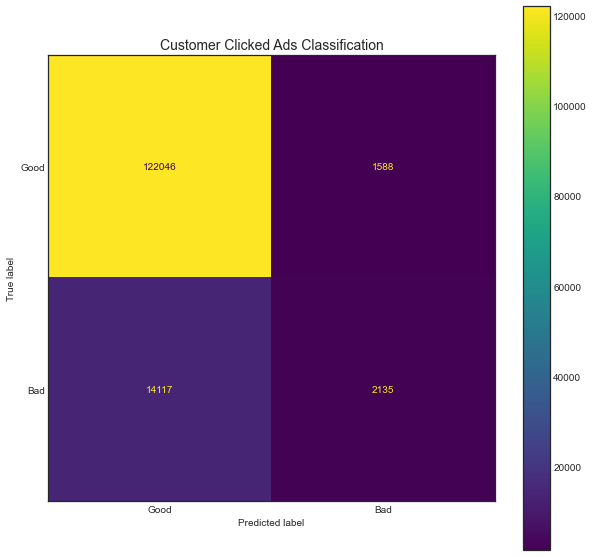

In [94]:
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Good', 'Bad'])

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title('Borrowers Status', fontsize=14)
plt.savefig('Confussion Matrix', dpi = 200)
plt.show()

Text(0.5, 1.0, 'Feature Importance Score')

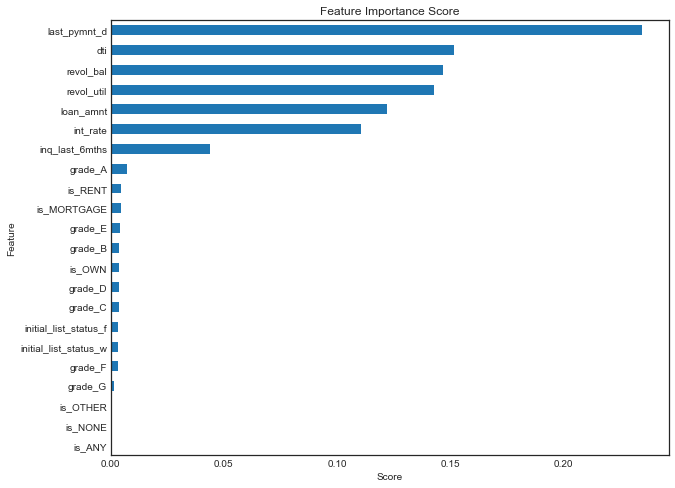

In [95]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10,8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')